In [1]:
from typing import Callable
from os import makedirs
from os.path import join
import numpy as np
import pandas as pd
from verma_net_radiation_sensitivity.verma_net_radiation_sensitivity import process_verma_net_radiation_table
from PTJPL_sensitivity import process_PTJPL_table
from sensitivity import perturbed_run
import matplotlib.pyplot as plt

ImportError: cannot import name 'sentinel_tile_grid' from 'sentinel_tiles' (/opt/homebrew/Caskroom/miniforge/base/envs/sensitivity/lib/python3.11/site-packages/sentinel_tiles/__init__.py)

In [2]:
input_df = pd.read_csv("calval_final_50_PTJPL_inputs.csv")
input_df = input_df[input_df.fAPARmax != 0]
input_df

,Unnamed: 0.1,tower,lat,lon,orbit,scene,tile,time_UTC,date_UTC,doy,...,VISdiff,NIRdiff,VISdir,NIRdir,SWout,LWin,LWout,hour_of_day,Topt,fAPARmax
0,0,US-Ha2,42.5393,-72.1779,9254,9,18TYN,2020-02-22 00:00:00,2020-02-22,53,...,0.000000,0.000000,0.000000,0.000000,0.000000,223.482510,310.837408,19,0.0,0.5545
1,1,US-Ha2,42.5393,-72.1779,10150,9,18TYN,2020-04-20 00:00:00,2020-04-20,111,...,0.000000,0.000000,0.000000,0.000000,0.000000,249.470817,483.042043,19,0.0,0.5545
2,2,US-Ha2,42.5393,-72.1779,10352,9,18TYN,2020-05-03 00:00:00,2020-05-03,124,...,0.000000,0.000000,0.000000,0.000000,0.000000,293.358154,368.124775,19,0.0,0.5545
3,3,US-Ha2,42.5393,-72.1779,10684,7,18TYN,2020-05-24 00:00:00,2020-05-24,145,...,3.627162,3.519072,0.337294,0.020315,0.662989,NaN,385.565499,19,0.0,0.5545
4,4,US-Ha2,42.5393,-72.1779,11069,8,18TYN,2020-06-18 00:00:00,2020-06-18,170,...,7.418505,8.696527,1.935220,0.123967,2.254700,380.029433,454.438012,19,0.0,0.5545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,247,US-xUK,39.0404,-95.1921,11909,6,15SUD,2020-08-11 00:00:00,2020-08-11,224,...,14.372975,12.682295,3.003822,0.000000,5.351180,414.848071,439.377199,17,5.8,0.4664
248,248,US-xUK,39.0404,-95.1921,16668,8,15SUD,2021-06-14 00:00:00,2021-06-14,165,...,32.456092,15.308895,93.412739,127.317082,27.991697,NaN,405.251251,17,5.8,0.4664
249,249,US-xUK,39.0404,-95.1921,16810,8,15SUD,2021-06-23 00:00:00,2021-06-23,174,...,38.645010,27.577193,80.881654,98.257540,28.021802,NaN,388.004691,17,5.8,0.4664
250,250,US-xUK,39.0404,-95.1921,16810,8,15SUD,2021-06-23 00:00:00,2021-06-23,174,...,38.645010,27.577193,80.881654,98.257540,28.021802,400.532814,463.095778,17,5.8,0.4664


In [3]:
np.nanmin(input_df.fAPARmax)

0.3301

In [4]:
def process_verma_PTJPL_table(input_df: pd.DataFrame) -> pd.DataFrame:
    return process_PTJPL_table(process_verma_net_radiation_table(input_df))

In [5]:
input_df = pd.read_csv("calval_final_50_PTJPL_inputs.csv")

if "Ta" in input_df and "Ta_C" not in input_df:
    # input_df.rename({"Ta": "Ta_C"}, inplace=True)
    input_df["Ta_C"] = input_df["Ta"]

input_df = input_df[input_df.fAPARmax.apply(lambda fAPARmax: fAPARmax > 0.001)]
input_df = input_df[input_df.NDVI.apply(lambda NDVI: NDVI > 0.05)]

np.nanmin(input_df.ST_C), np.nanmax(input_df.ST_C)

(0.89, 49.33)

In [6]:
input_variable = "LST"
output_variable = "LE"
results = perturbed_run(input_df, input_variable, output_variable, process_verma_PTJPL_table)
results

,tower,time_solar,LST_unperturbed,LST_perturbation,LST_perturbation_std,LST_perturbed,LE_unperturbed,LE_perturbation,LE_perturbation_std,LE_perturbed
0,US-Ha2,2020-02-21 19:11:17.304,274.04,8.087404,1.117500,282.127404,0.0,0.0,0.0,0.0
1,US-Ha2,2020-02-21 19:11:17.304,274.04,3.162342,0.436966,277.202342,0.0,0.0,0.0,0.0
2,US-Ha2,2020-02-21 19:11:17.304,274.04,4.740298,0.655004,278.780298,0.0,0.0,0.0,0.0
3,US-Ha2,2020-02-21 19:11:17.304,274.04,3.099681,0.428307,277.139681,0.0,0.0,0.0,0.0
4,US-Ha2,2020-02-21 19:11:17.304,274.04,7.749916,1.070867,281.789916,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25195,US-xUN,2020-09-03 18:01:51.048,279.62,-2.319158,-0.320456,277.300842,NaN,NaN,NaN,NaN
25196,US-xUN,2020-09-03 18:01:51.048,279.62,6.834654,0.944398,286.454654,NaN,NaN,NaN,NaN
25197,US-xUN,2020-09-03 18:01:51.048,279.62,-3.514660,-0.485648,276.10534,NaN,NaN,NaN,NaN
25198,US-xUN,2020-09-03 18:01:51.048,279.62,3.183503,0.439890,282.803503,NaN,NaN,NaN,NaN


input variable: LST
output variable: LE
analysis_CSVs/PT-JPL/PT-JPL_LST_to_LE.csv


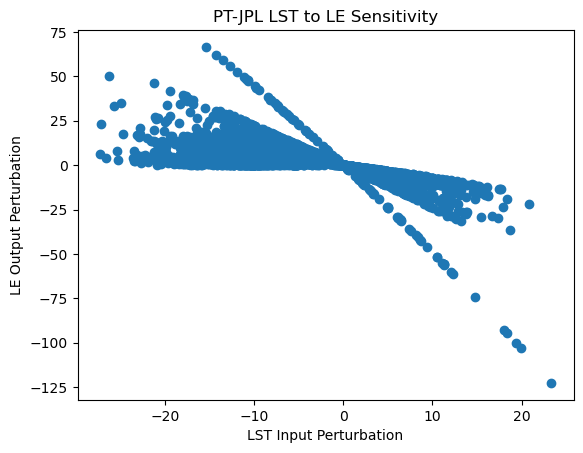

input variable: LST
output variable: LE_canopy
analysis_CSVs/PT-JPL/PT-JPL_LST_to_LE_canopy.csv


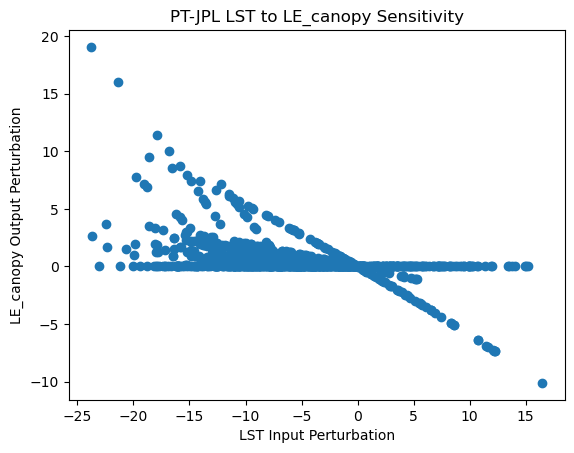

input variable: LST
output variable: LE_interception
analysis_CSVs/PT-JPL/PT-JPL_LST_to_LE_interception.csv


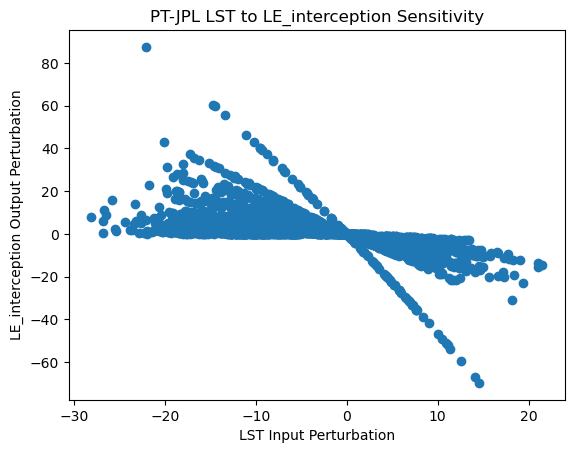

input variable: LST
output variable: LE_soil
analysis_CSVs/PT-JPL/PT-JPL_LST_to_LE_soil.csv


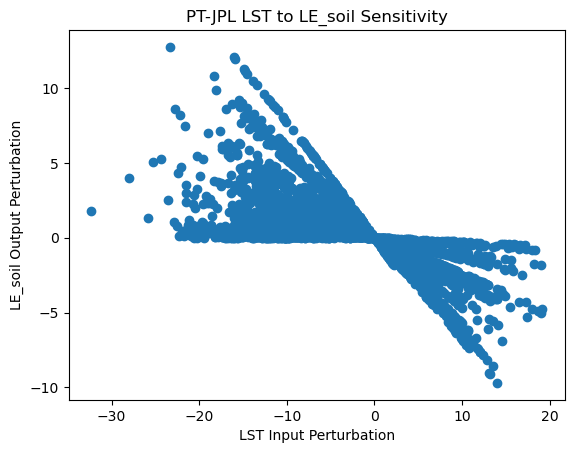

input variable: NDVI
output variable: LE
analysis_CSVs/PT-JPL/PT-JPL_NDVI_to_LE.csv


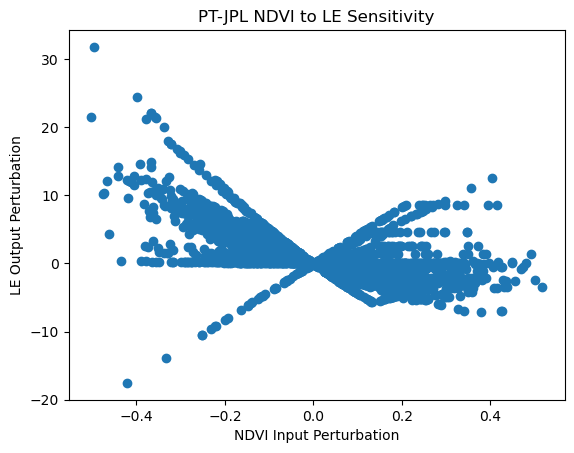

input variable: NDVI
output variable: LE_canopy
analysis_CSVs/PT-JPL/PT-JPL_NDVI_to_LE_canopy.csv


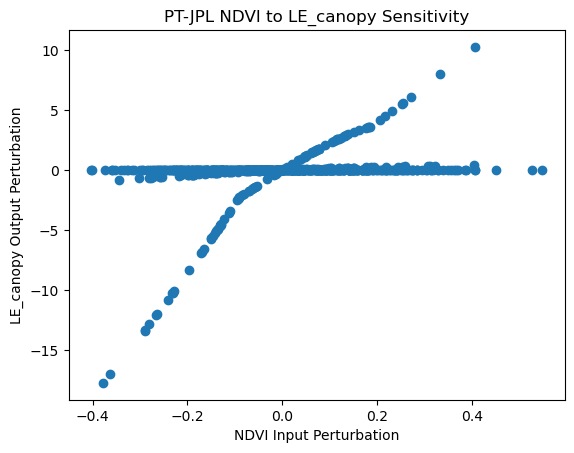

input variable: NDVI
output variable: LE_interception
analysis_CSVs/PT-JPL/PT-JPL_NDVI_to_LE_interception.csv


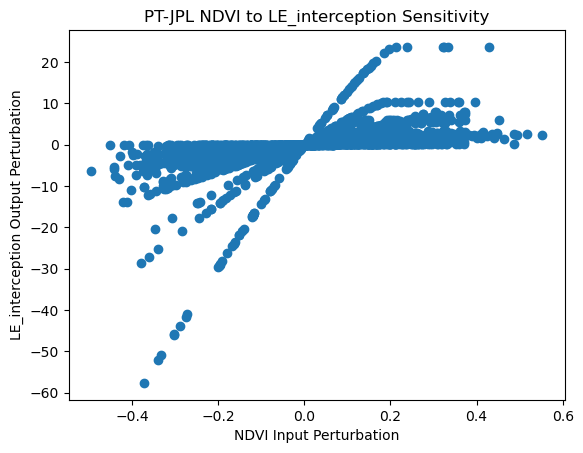

input variable: NDVI
output variable: LE_soil
analysis_CSVs/PT-JPL/PT-JPL_NDVI_to_LE_soil.csv


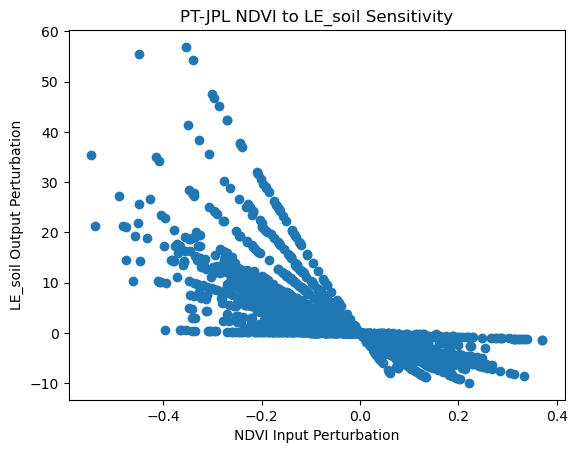

input variable: albedo
output variable: LE
analysis_CSVs/PT-JPL/PT-JPL_albedo_to_LE.csv


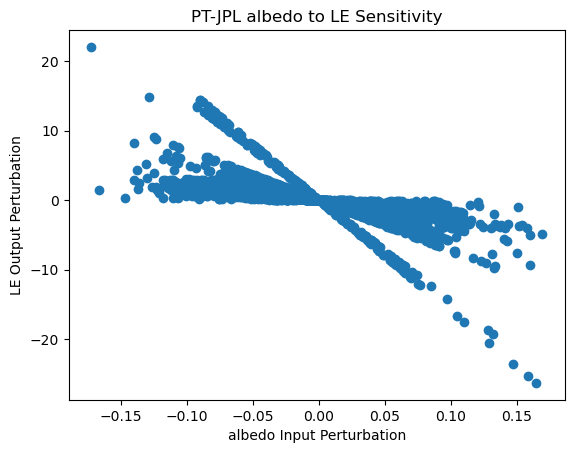

input variable: albedo
output variable: LE_canopy
analysis_CSVs/PT-JPL/PT-JPL_albedo_to_LE_canopy.csv


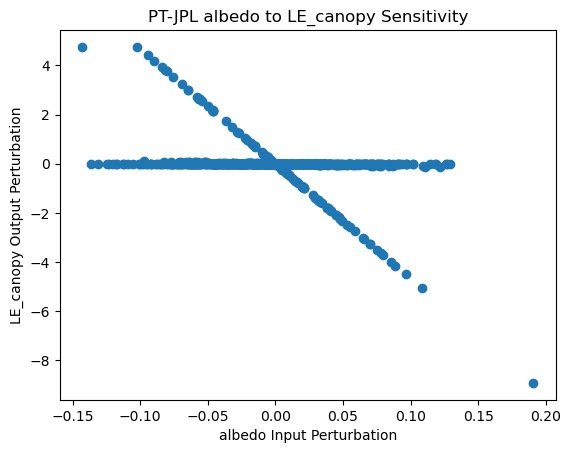

input variable: albedo
output variable: LE_interception
analysis_CSVs/PT-JPL/PT-JPL_albedo_to_LE_interception.csv


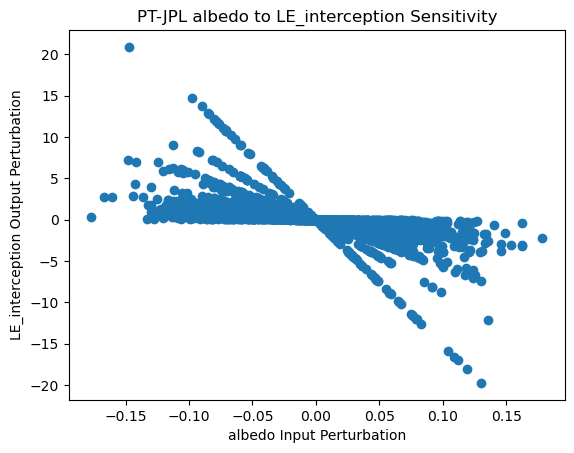

input variable: albedo
output variable: LE_soil
analysis_CSVs/PT-JPL/PT-JPL_albedo_to_LE_soil.csv


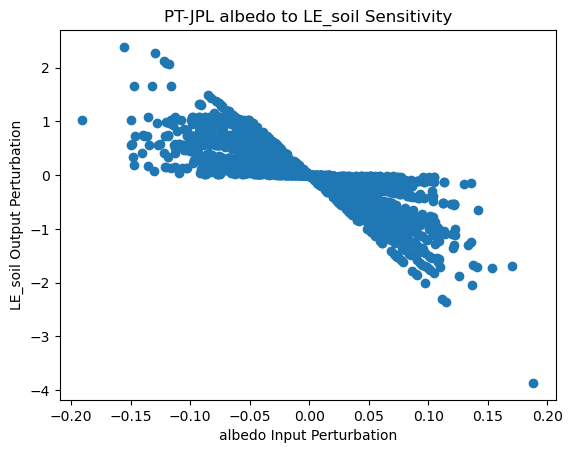

input variable: Ta_C
output variable: LE
analysis_CSVs/PT-JPL/PT-JPL_Ta_C_to_LE.csv


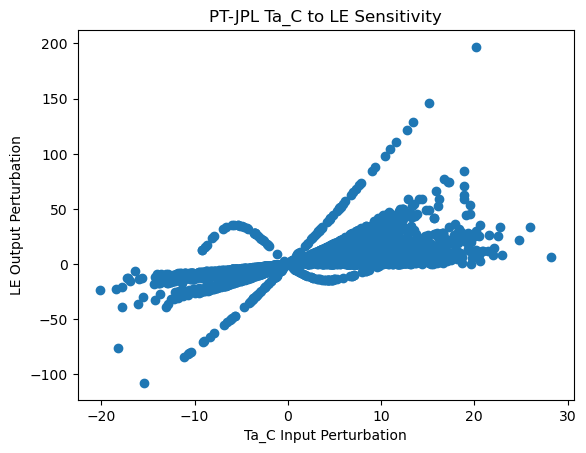

input variable: Ta_C
output variable: LE_canopy
analysis_CSVs/PT-JPL/PT-JPL_Ta_C_to_LE_canopy.csv


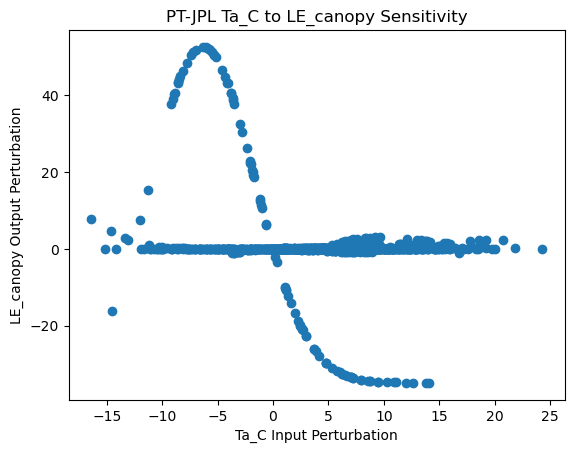

input variable: Ta_C
output variable: LE_interception
analysis_CSVs/PT-JPL/PT-JPL_Ta_C_to_LE_interception.csv


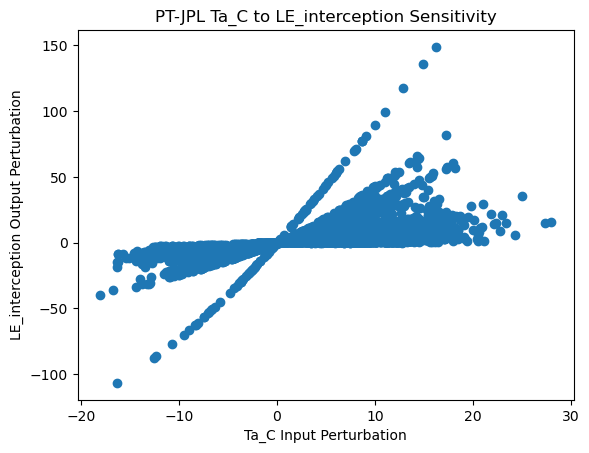

input variable: Ta_C
output variable: LE_soil
analysis_CSVs/PT-JPL/PT-JPL_Ta_C_to_LE_soil.csv


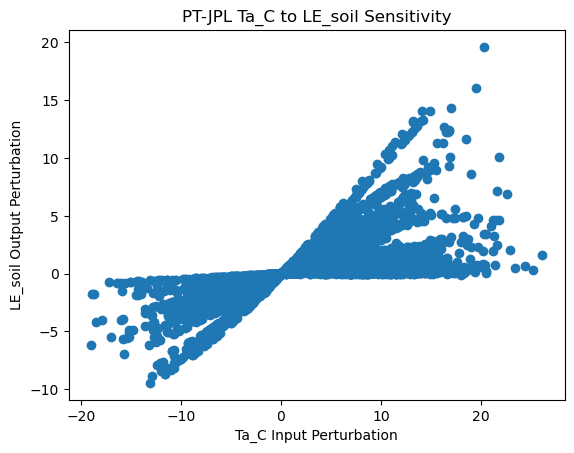

input variable: RH
output variable: LE
analysis_CSVs/PT-JPL/PT-JPL_RH_to_LE.csv


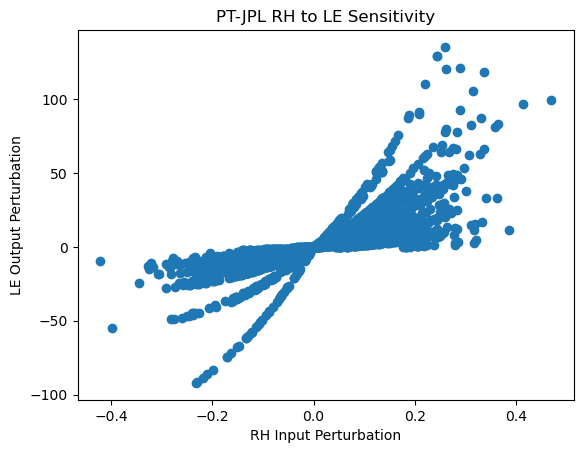

input variable: RH
output variable: LE_canopy
analysis_CSVs/PT-JPL/PT-JPL_RH_to_LE_canopy.csv


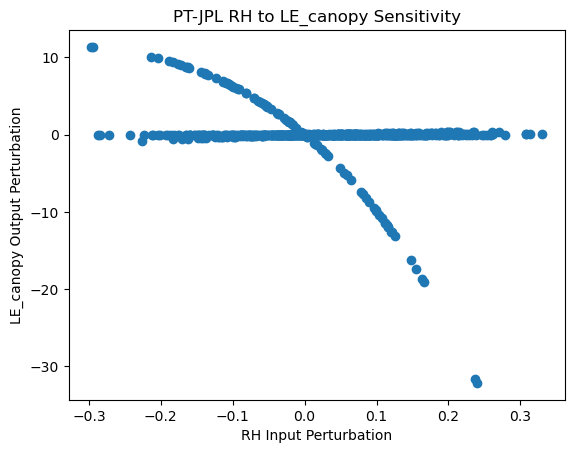

input variable: RH
output variable: LE_interception
analysis_CSVs/PT-JPL/PT-JPL_RH_to_LE_interception.csv


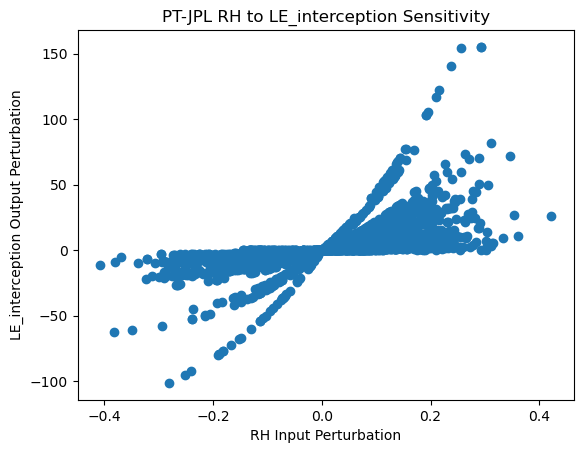

input variable: RH
output variable: LE_soil
analysis_CSVs/PT-JPL/PT-JPL_RH_to_LE_soil.csv


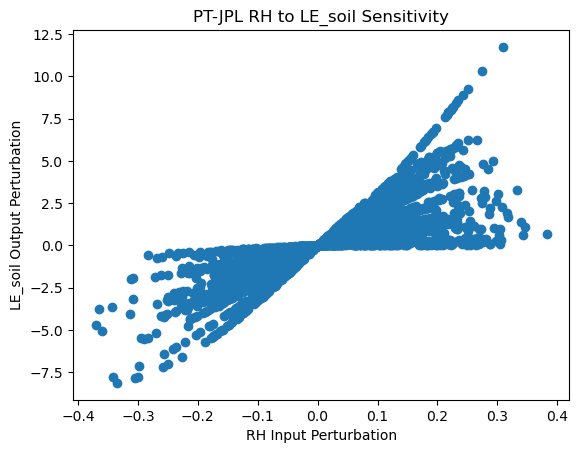

input variable: Rg
output variable: LE
analysis_CSVs/PT-JPL/PT-JPL_Rg_to_LE.csv


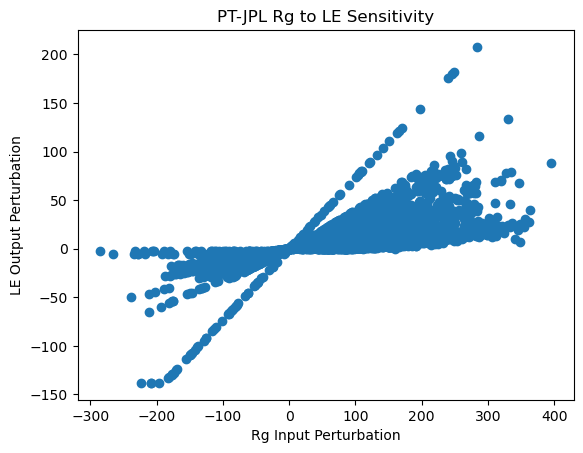

input variable: Rg
output variable: LE_canopy
analysis_CSVs/PT-JPL/PT-JPL_Rg_to_LE_canopy.csv


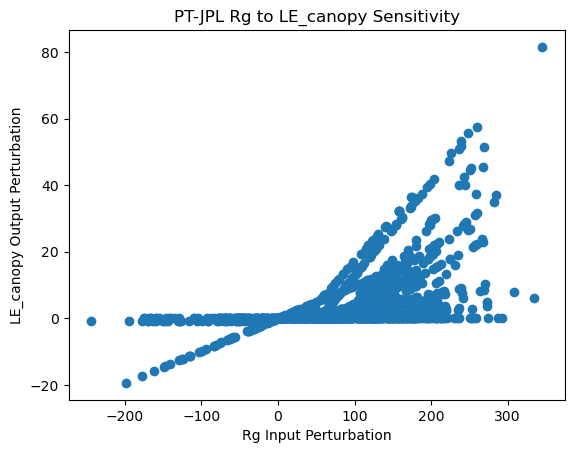

input variable: Rg
output variable: LE_interception
analysis_CSVs/PT-JPL/PT-JPL_Rg_to_LE_interception.csv


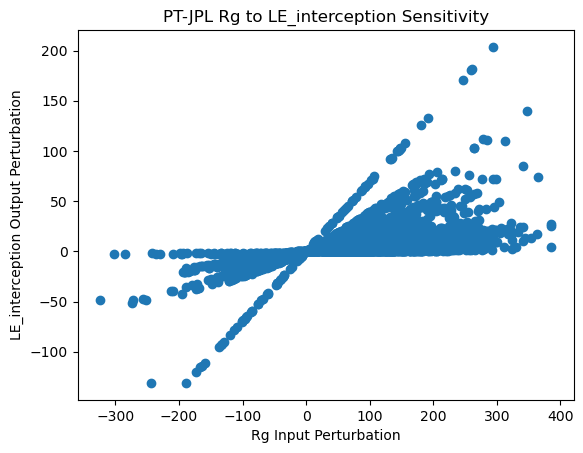

input variable: Rg
output variable: LE_soil
analysis_CSVs/PT-JPL/PT-JPL_Rg_to_LE_soil.csv


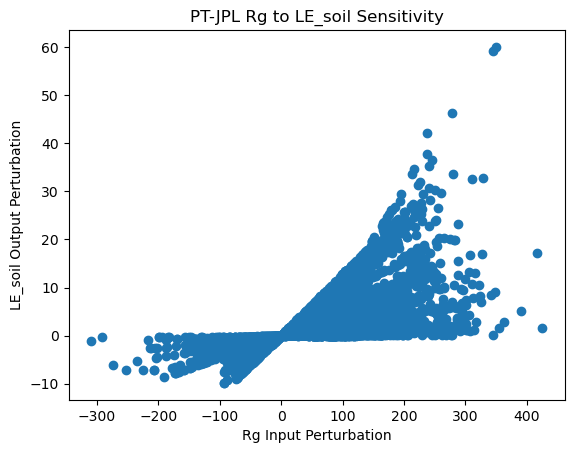

,tower,time_solar,LST_unperturbed,LST_perturbation,LST_perturbation_std,LST_perturbed,LE_unperturbed,LE_perturbation,LE_perturbation_std,LE_perturbed,...,Ta_C_perturbation_std,Ta_C_perturbed,RH_unperturbed,RH_perturbation,RH_perturbation_std,RH_perturbed,Rg_unperturbed,Rg_perturbation,Rg_perturbation_std,Rg_perturbed
69,US-Ha2,2020-02-21 19:11:17.304,274.04,-23.477011,-3.244004,250.562989,0.0,2.460271,0.160498,2.460271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,US-Ha2,2020-05-02 19:11:17.304,286.32,-21.294240,-2.942393,265.02576,0.0,7.456942,0.486461,7.456942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258,US-Ha2,2020-05-02 19:11:17.304,286.32,-19.588163,-2.706651,266.731837,0.0,5.191227,0.338655,5.191227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,US-Ha2,2020-05-23 19:11:17.304,288.76,8.015444,1.107557,296.775444,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,US-Ha2,2020-05-23 19:11:17.304,288.76,-1.991563,-0.275190,286.768437,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25095,US-xUK,2021-06-22 17:39:13.896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,260.109914,-38.204594,-0.369919,221.90532
25096,US-xUK,2021-06-22 17:39:13.896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,260.109914,56.475938,0.546833,316.585851
25097,US-xUK,2021-06-22 17:39:13.896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,260.109914,99.513902,0.963551,359.623816
25098,US-xUK,2021-06-22 17:39:13.896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,260.109914,-95.760012,-0.927204,164.349902


In [7]:
model_name = "PT-JPL"
forward_process = process_verma_PTJPL_table   
input_variables = ["LST", "NDVI", "albedo", "Ta_C", "RH", "Rg"]
output_variables = ["LE", "LE_canopy", "LE_interception", "LE_soil"]

results = []
correlations = []

for input_variable in input_variables:
    for output_variable in output_variables:
        print(f"input variable: {input_variable}")
        print(f"output variable: {output_variable}")
        
        # run forward process with perturbation
        run_results = perturbed_run(input_df, input_variable, output_variable, forward_process)
        run_results = run_results[run_results[f"{output_variable}_perturbed"] != 0]
        run_results = run_results[run_results[f"{output_variable}_perturbation"] != 0]

        if len(run_results) == 0:
            print(f"no relationship between {input_variable} and {output_variable}")
            continue

        directory = join("analysis_CSVs", model_name)
        makedirs(directory, exist_ok=True)
        filename = join(directory, f"{model_name}_{input_variable}_to_{output_variable}.csv")
        print(filename)
        run_results.to_csv(filename, index=False)

        # input_perturbation = np.array(run_results[f"{input_variable}_perturbation_std"])
        input_perturbation = np.array(run_results[f"{input_variable}_perturbation"])
        # print(len(input_perturbation))
        # output_perturbation = np.array(run_results[f"{output_variable}_perturbation_std"])
        output_perturbation = np.array(run_results[f"{output_variable}_perturbation"])
        # print(len(output_perturbation))
        # perturbation_correlation = np.corrcoef(input_perturbation, output_perturbation)[0,1]
        # correlations.append([input_variable, output_variable, perturation_core])

        # create figure and axis objects
        fig, ax = plt.subplots()

        # create scatter plot
        ax.scatter(input_perturbation, output_perturbation)

        # set title and axis labels
        ax.set_title(f"{model_name} {input_variable} to {output_variable} Sensitivity")
        # ax.set_xlabel(f"{input_variable} Input Perturbation Sigma")
        # ax.set_ylabel(f"{output_variable} Output Perturbation Sigma")
        ax.set_xlabel(f"{input_variable} Input Perturbation")
        ax.set_ylabel(f"{output_variable} Output Perturbation")
        # show plot
        plt.show()

        results.append(run_results)

results = pd.concat(results)
# correlations = pd.DataFrame(correlations, columns=["input_variable", "output_variable", "correlation"]) 
# correlations
results

In [8]:
results_std = results[[column for column in results.columns if column.endswith("std")]]
results_std.columns = [column.replace("_perturbation_std", "") for column in results_std.columns]
results_std_corr = results_std.corr().round(2)
results_std_corr

,LST,LE,LE_canopy,LE_interception,LE_soil,NDVI,albedo,Ta_C,RH,Rg
LST,1.00,-0.67,-0.53,-0.61,-0.67,NaN,NaN,NaN,NaN,NaN
LE,-0.67,1.00,NaN,NaN,NaN,-0.60,-0.73,0.57,0.76,0.65
LE_canopy,-0.53,NaN,1.00,NaN,NaN,0.36,-0.42,-0.29,-0.33,0.56
LE_interception,-0.61,NaN,NaN,1.00,NaN,0.58,-0.66,0.55,0.67,0.55
LE_soil,-0.67,NaN,NaN,NaN,1.00,-0.75,-0.86,0.63,0.81,0.57
NDVI,NaN,-0.60,0.36,0.58,-0.75,1.00,NaN,NaN,NaN,NaN
albedo,NaN,-0.73,-0.42,-0.66,-0.86,NaN,1.00,NaN,NaN,NaN
Ta_C,NaN,0.57,-0.29,0.55,0.63,NaN,NaN,1.00,NaN,NaN
RH,NaN,0.76,-0.33,0.67,0.81,NaN,NaN,NaN,1.00,NaN
Rg,NaN,0.65,0.56,0.55,0.57,NaN,NaN,NaN,NaN,1.00


In [9]:
results_std_corr.to_csv('results_std_corr.csv', index=True)